【課程名稱】<font color=#FF0000>機器學習(Machine Learning, ML)</font><br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位資訊學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>

In [1]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob, socket, pickle, joblib
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))
print("【matplotlib】{}".format(mpl.__version__))
print("【seaborn】{}".format(sns.__version__))
print("【sklearn】{}".format(sklearn.__version__))

# %autosave 120

【日期時間】2025/03/28 20:09:34
【工作目錄】E:\ml\code
【主機名稱】502-11 (10.100.52.11)
【Python】3.12.4
【matplotlib】3.8.4
【seaborn】0.13.2
【sklearn】1.4.2


In [2]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字型為微軟正黑體
# plt.rcParams['axes.unicode_minus'] = False                # 解決負號顯示問題

# macfont = FontProperties(fname="/Library/Fonts/Arial Unicode.ttf", size=10) 

<img src='http://180.218.162.136:2018/Images/PyML/kNN.png' width=200 align=left></img>

### <font color=#0000FF>kNN (K-th Nearest Neighbors, K-近鄰演算法) </font>

### <font color=red>sklearn.neighbors.KNeighborsClassifier()</font>

### <a id=iris><font color=#0000FF>【iris資料集】</font></a> [【HOME】](#HOME)

In [3]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### <font color=#0000FF>載入資料集</font>

In [4]:
uri = 'C:/Data/PyMLData/iris.csv'
iris = pd.read_csv(uri, sep=',', encoding='utf-8', engine='python')
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
print(iris["Species"].value_counts())

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [6]:
iris.isna().sum(axis=0)

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [11]:
X = iris.iloc[:, :-1].to_numpy()
y = iris["Species"].to_numpy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=None, 
                                                    stratify=y)          # 分層抽樣的依據

In [13]:
model = KNeighborsClassifier(n_neighbors=5,           # kNN 的 k  最近的五個點
                             weights='uniform',
                             p=2,                     # p=2 : euclidean_distance
                             metric='minkowski',)

In [14]:
model.fit(X_train, y_train)
print(f"train acc : {model.score(X_train, y_train):.2%}")
print(f"test acc : {model.score(X_test, y_test):.2%}")

##  老師的範例中 train acc < test acc
##  為什麼會有這種狀況???
##  因為有可能不好分類的都被丟到 train裡面了 !!!

train acc : 98.33%
test acc : 93.33%


In [17]:
mtx = pd.crosstab(index=y_train,
                  columns=model.predict(X_train),
                  rownames=["Actual"],
                  colnames=["Predicted"],)
mtx

Predicted,setosa,versicolor,virginica
Actual,,,
setosa,40,0,0
versicolor,0,39,1
virginica,0,1,39


In [18]:
print(iris.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


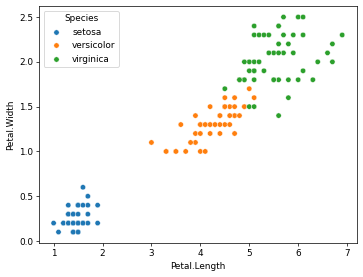

In [19]:
sns.scatterplot(data=iris,
                x="Petal.Length",
                y="Petal.Width",
                hue="Species")
fig = plt.gcf()
fig.set_dpi(64)
plt.show()


# 可以看得出來她分得很好

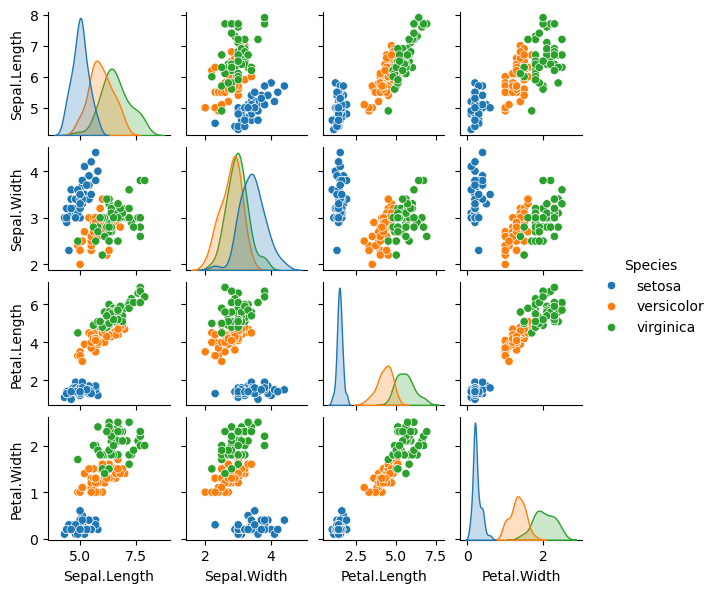

In [20]:
sns.pairplot(data=iris, hue="Species", height=1.5)
plt.show()

## 可以看出來藍色跟大家都可以比較好的分開來

### <font color=red>【回家練習】依據以上，如果 X 只挑選 Petal.Length & Petal.Width 兩個特徵，進行 kNN 演算法，正確率會如何呢?</font>

### <font color=#0000FF>如何找到 kNN 較佳的 k 值</font>

In [21]:
K = range(3, 21, 2)
result = list()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=None, 
                                                    stratify=y)
for k in K :
    model = KNeighborsClassifier(n_neighbors=k,)
    model.fit(X_train, y_train)
    result.append({"k":k,
                   "train_acc":model.score(X_train, y_train),
                   "test_acc":model.score(X_test, y_test)})
df = pd.DataFrame(result)
df
# 這個結果要怎麼找很直觀 
# 不一定是1又是最好的 所以可能要多抽幾次

,k,train_acc,test_acc
0,3,0.950000,1.000000
1,5,0.966667,1.000000
2,7,0.975000,1.000000
3,9,0.966667,0.966667
4,11,0.975000,0.966667
5,13,0.975000,1.000000
6,15,0.975000,0.966667
7,17,0.975000,1.000000
8,19,0.966667,1.000000


In [25]:
# 所以這裡我讓她多抽了好幾次
K = range(3, 21, 2)
result = list()

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=None, 
                                                        stratify=y)
    for k in K :
        model = KNeighborsClassifier(n_neighbors=k,)
        model.fit(X_train, y_train)
        result.append({"k":k,
                       "train_acc":model.score(X_train, y_train),
                       "test_acc":model.score(X_test, y_test)})
df = pd.DataFrame(result)
df

,k,train_acc,test_acc
0,3,0.966667,0.966667
1,5,0.975000,0.966667
2,7,0.966667,0.966667
3,9,0.975000,0.966667
4,11,0.983333,0.966667
...,...,...,...
8995,11,0.983333,1.000000
8996,13,0.975000,0.966667
8997,15,0.975000,1.000000
8998,17,0.975000,0.966667


In [31]:
df_m = df.groupby(['k']).agg({'k_mean': mean, 'k_std': std}).reset_index()

NameError: name 'mean' is not defined

In [ ]:
# 老師說兩個差距不要太大 且 兩個都要很大


### <a id=heartdisease><font color=#0000FF>【heart_disease資料集】</font></a> [【HOME】](#HOME)
該數據庫包含76個屬性，但在所有已發布的實驗中，我們使用其中14個屬性的子集。 特別是，克利夫蘭數據庫是ML研究人員迄今為止唯一使用過的數據庫。 “目標”num是指患者中存在心臟病。 它的整數值從0（無存在）到4.克利夫蘭數據庫的實驗集中於簡單地嘗試區分存在（值1,2,3,4）和不存在（值0）。

---

1. age : Age of patient
2. sex : (value 1: Male; value 0 : Female)
3. cp : Chest Pain Type (胸痛類型)
    - value 1: typical type 1 angina (典型的1型心絞痛)
    - value 2: typical type angina (典型的心絞痛)
    - value 3: non-angina pain (非心絞痛)
    - value 4: asymptomatic (無症狀)
4. trestbps : Treat Blood Pressure (mm Hg on admission to the hospital)
 (治療血壓，入院時)
5. chol : Serum Cholesterol (mg/dl) (血清膽固醇)
6. fbs : Fasting Blood Sugar (空腹血糖)
    - value 1: > 120 mg/dl
    - value 0: < 120 mg/dl)
7. restecg : resting electrographic results (靜息電圖結果)
    - value 0: normal
    - value 1: 1 having ST-T wave abnormality
    - value 2: showing probable or definite left ventricular hypertrophy
8. thalach : maximum heart rate achieved (最大心率)
9. exang : exercise induced angina (運動誘發心絞痛)
    - value 1: yes
    - value 0: no
10. oldpeak : ST depression induced by exercise relative to rest (運動引起ST段壓低相對於休息)  
11. slope : slope of peak exercise ST (高峰運動ST的斜率)
    - value 1: unsloping
    - value 2: flat
    - value 3: downsloping
12. ca : number of major vessel (value 0 – 3) (主要導管數量)
13. thal : Thal (地中海型貧血)
    - value 3: normal (正常)
    - value 6: fixed defect (固定缺陷)
    - value 7: reversible defect (可逆缺陷)
14. num : 
    - value 0 : 沒有心臟病
    - Value 1-4 : 有心臟病

In [ ]:
fname = r"C:/Data/PyMLData/heart_disease.data"

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 
        'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 
        'slope', 'ca', 'thal', 'num']

heartdisease = pd.read_csv(fname, sep=',', header=None, na_values='?',
                           encoding='utf-8', engine='python', names=cols)

print(heartdisease.shape)
heartdisease.head(3)

### <font color=red>sklearn.neighbors.KNeighborsRegressor()</font>

### <font color=#0000FF>波士頓房價預測</font>

【Housing】Dataset

- CRIM: Per capita crime rate by town 
    - 按城鎮劃分的人均犯罪率
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft 
    - 劃定面積超過25,000平方英尺的住宅用地比例
- INDUS: Proportion of non-retail business acres per town 
    - 每個城鎮非零售業務英畝的比例
- CHAS: Charles River dummy variable (= 1 if tract bounds river and 0 otherwise)
    - Charles River虛擬變量（如果區域限制河流，則為1，否則為0）
- NOX: Nitric oxide concentration (parts per 10 million)
    - 一氧化氮濃度（百萬分之幾）
- RM: Average number of rooms per dwelling
    - 每個住宅的平均房間數
- AGE: Proportion of owner-occupied units built prior to 1940
    - 1940年之前建造的自有住房的比例
- DIS: Weighted distances to five Boston employment centers
    - 到五個波士頓就業中心的加權距離
- RAD: Index of accessibility to radial highways
    - 徑向公路的可達性指數
- TAX: Full-value property tax rate per \\$10,000
    - 每 \\$ 10,000美元的全值財產稅率
- PTRATIO: Pupil-teacher ratio by town
    - 各鎮的師生比例
- B: $1000（Bk – 0.63）^2$ , where Bk is the proportion of [people of African American descent] by town
    - $1000（Bk – 0.63）^2$，其中Bk是[非裔美國人]按城鎮劃分的比例
- LSTAT: Percentage of lower status of the population
    - 低等人口百分比
- MEDV: Median value of owner-occupied homes in \\$1000s
    - 自有住房的中位數值，單位為1000美元

In [ ]:
# fname = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt"
fname = r"C:/Data/PyMLData/housing.data.txt"
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
            'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
            'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(fname, header=None, sep="\s+", names=colnames)
data.head()